In [1]:
!pip install pandasql
!pip install sqlalchemy==1.4.46
!pip install sweetviz
!pip install lazypredict
!pip install yellowbrick

!pip install missingno

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sweetviz as sv
import missingno as msno
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('newsleep_health_lifestyle_dataset.csv')
df['BMICategory'] = df['BMICategory'].astype('category')
df['BMICategory'] = df['BMICategory'].cat.codes
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df['SleepDisorder'] = df['SleepDisorder'].astype('category')
df['SleepDisorder'] = df['SleepDisorder'].cat.codes
df = df.drop(columns=['PersonID'], axis=1)
df.head()

,Gender,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,HeartRate,DailySteps,SleepDisorder
0,1,21,6.8,1.0,32,5,0,92,13767,0
1,0,23,8.7,1.0,12,2,2,76,14852,0
2,0,31,7.4,1.0,33,10,2,70,7213,0
3,1,21,6.8,1.7,65,6,3,53,7162,0
4,1,66,9.0,1.7,69,1,3,78,3445,1


In [4]:
df.describe()

,Gender,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,HeartRate,DailySteps,SleepDisorder
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,0.494949,39.540404,8.030303,6.142929,65.151515,5.449495,1.555556,75.954545,11053.815657,0.270202
std,0.500607,13.478567,2.394200,1.967888,32.315490,2.810464,1.104396,15.113677,5364.089767,0.444626
min,0.000000,18.000000,4.100000,1.000000,10.000000,1.000000,0.000000,50.000000,2067.000000,0.000000
25%,0.000000,28.750000,5.875000,4.700000,35.750000,3.000000,1.000000,63.000000,6165.250000,0.000000
50%,0.000000,40.000000,8.200000,6.200000,66.000000,5.000000,2.000000,77.000000,11774.000000,0.000000
75%,1.000000,49.000000,10.100000,7.500000,94.000000,8.000000,3.000000,90.000000,15803.000000,1.000000
max,1.000000,80.000000,12.000000,10.000000,120.000000,10.000000,3.000000,100.000000,19958.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 396 non-null    int8   
 1   Age                    396 non-null    int64  
 2   SleepDuration          396 non-null    float64
 3   QualityofSleep         396 non-null    float64
 4   PhysicalActivityLevel  396 non-null    int64  
 5   StressLevel            396 non-null    int64  
 6   BMICategory            396 non-null    int8   
 7   HeartRate              396 non-null    int64  
 8   DailySteps             396 non-null    int64  
 9   SleepDisorder          396 non-null    int8   
dtypes: float64(2), int64(5), int8(3)
memory usage: 22.9 KB


In [6]:
sum(df.duplicated())

0

[Text(0.5, 1.0, 'Checking how balanced the outcome variable is')]

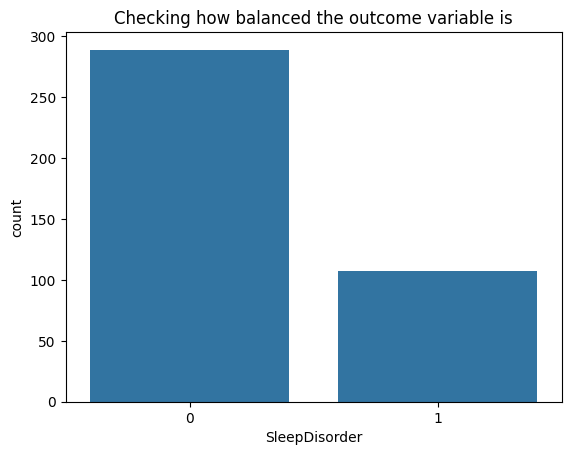

In [7]:
g = sns.countplot(data=df, x='SleepDisorder')
g.set(title='Checking how balanced the outcome variable is')

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1234, stratify=df['SleepDisorder'])


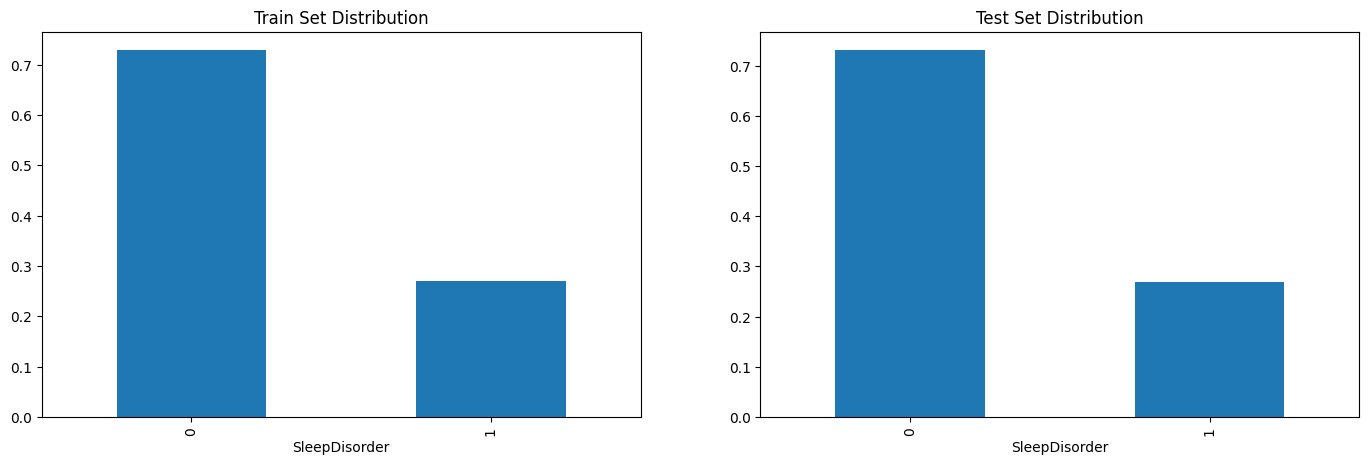

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5))
df_train['SleepDisorder'].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Train Set Distribution")

df_test['SleepDisorder'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title('Test Set Distribution')
plt.show()

In [10]:
corr = df_train.corr()
corr

,Gender,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,HeartRate,DailySteps,SleepDisorder
Gender,1.000000,0.000555,-0.021732,0.081528,-0.018646,-0.010796,-0.023728,-0.043464,-0.068459,0.084133
Age,0.000555,1.000000,0.012802,-0.028459,0.067531,0.087946,-0.043365,0.022616,-0.030429,-0.055916
SleepDuration,-0.021732,0.012802,1.000000,-0.008132,0.023980,0.088670,0.105441,0.027117,-0.064729,0.005519
QualityofSleep,0.081528,-0.028459,-0.008132,1.000000,-0.073609,-0.030707,-0.082681,0.035044,-0.076141,-0.042640
PhysicalActivityLevel,-0.018646,0.067531,0.023980,-0.073609,1.000000,0.001570,0.014000,-0.108484,0.015266,-0.133106
StressLevel,-0.010796,0.087946,0.088670,-0.030707,0.001570,1.000000,0.091871,0.117252,-0.044423,0.019533
BMICategory,-0.023728,-0.043365,0.105441,-0.082681,0.014000,0.091871,1.000000,0.062688,-0.035095,0.024426
HeartRate,-0.043464,0.022616,0.027117,0.035044,-0.108484,0.117252,0.062688,1.000000,0.013890,-0.011496
DailySteps,-0.068459,-0.030429,-0.064729,-0.076141,0.015266,-0.044423,-0.035095,0.013890,1.000000,0.125524
SleepDisorder,0.084133,-0.055916,0.005519,-0.042640,-0.133106,0.019533,0.024426,-0.011496,0.125524,1.000000


<Axes: >

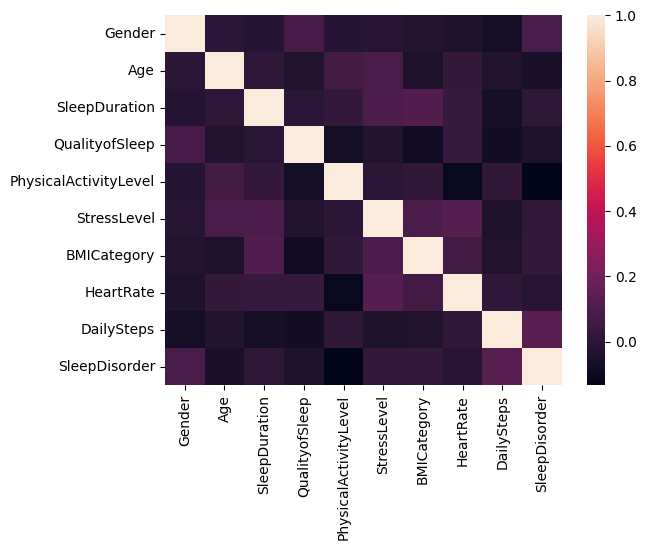

In [11]:
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)

<Axes: xlabel='SleepDisorder', ylabel='PhysicalActivityLevel'>

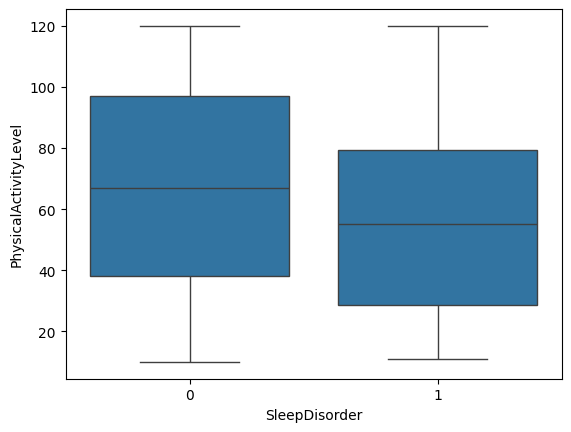

In [13]:
sns.boxplot(y="PhysicalActivityLevel", x = "SleepDisorder", data=df_train)

<Axes: xlabel='SleepDisorder', ylabel='Age'>

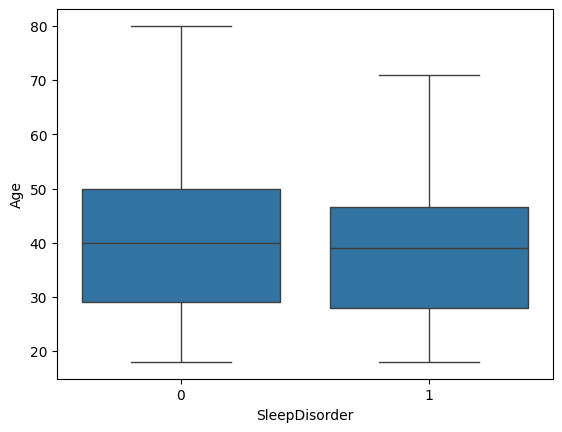

In [14]:
sns.boxplot(y="Age", x = "SleepDisorder", data=df_train)

<Axes: xlabel='SleepDisorder', ylabel='DailySteps'>

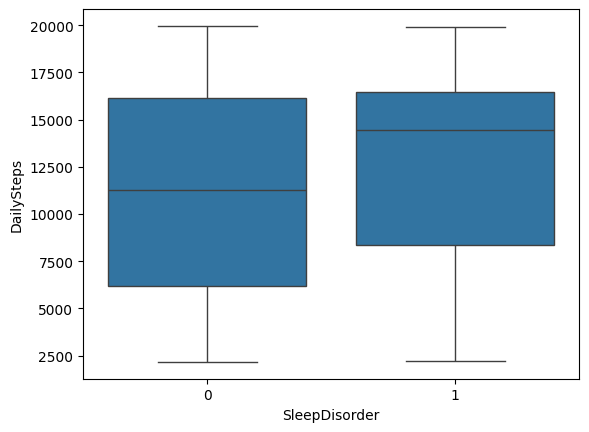

In [15]:
sns.boxplot(y="DailySteps", x = "SleepDisorder", data=df_train)

<Axes: xlabel='SleepDisorder', ylabel='QualityofSleep'>

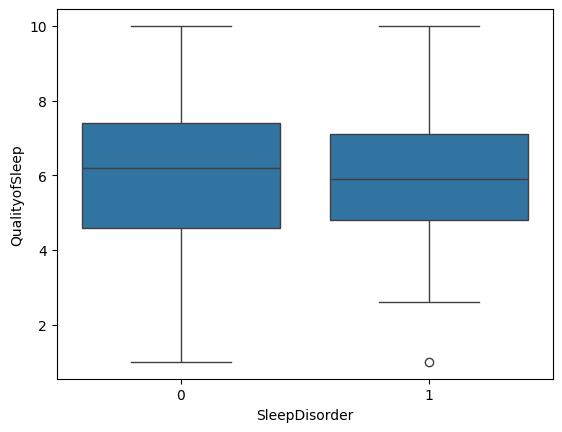

In [16]:
sns.boxplot(y="QualityofSleep", x = "SleepDisorder", data=df_train)

In [17]:
df.head()

,Gender,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,HeartRate,DailySteps,SleepDisorder
0,1,21,6.8,1.0,32,5,0,92,13767,0
1,0,23,8.7,1.0,12,2,2,76,14852,0
2,0,31,7.4,1.0,33,10,2,70,7213,0
3,1,21,6.8,1.7,65,6,3,53,7162,0
4,1,66,9.0,1.7,69,1,3,78,3445,1


In [18]:
X_train = df_train.drop('SleepDisorder', axis=1)
X_test = df_test.drop('SleepDisorder', axis=1)

y_train = df_train['SleepDisorder']
y_test = df_test['SleepDisorder']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(277, 9)
(119, 9)
(277,)
(119,)


In [19]:
X_train.head()

,Gender,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,HeartRate,DailySteps
104,1,44,8.5,4.8,107,3,2,68,5924
357,0,31,5.1,8.9,90,6,2,81,19888
76,1,18,9.1,4.5,30,3,2,78,16680
365,1,68,8.6,9.1,98,10,2,96,14180
376,0,43,8.3,9.5,111,4,0,89,6134


In [20]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

model = LogisticRegression(class_weight='balanced', solver='liblinear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train)   # You fit on the train set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [22]:
print(X_train['Age'].mean())
print(X_train_scaled['Age'].mean())
print(X_train_scaled['Age'].std())

39.6101083032491
-1.1382792021427597e-16
1.0018099562321174


In [23]:
model_scaled = LogisticRegression(class_weight='balanced', solver='liblinear') ##added to ensure the model included the small class.
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled_model = model_scaled.predict(X_test_scaled)

In [24]:
accuracy = met.accuracy_score(y_test, y_pred)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred, average='macro')  

print("Accuracy stats for the unscaled data model:")
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2))

print("F1-score: ", np.round(f1*100.0,2))

Accuracy stats for the unscaled data model:
Accuracy: 56.3
Balanced Accuracy: 49.37
F1-score:  49.01


In [25]:
accuracy = met.accuracy_score(y_test, y_pred_scaled_model)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred_scaled_model)
f1 = met.f1_score(y_test, y_pred_scaled_model, average='macro')

print("Accuracy stats for the scaled data model:")
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2))

print("F1-score: ", np.round(f1*100.0,2)) 

Accuracy stats for the scaled data model:
Accuracy: 56.3
Balanced Accuracy: 49.37
F1-score:  49.01


In [26]:
cm = met.confusion_matrix(y_test, y_pred)
print(cm)

[[56 31]
 [21 11]]


In [27]:
cm = met.confusion_matrix(y_test, y_pred_scaled_model)
print(cm)

[[56 31]
 [21 11]]


In [28]:
def visualize_classification(y_test, y_pred):

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
   
    cf_matrix = confusion_matrix(y_test, y_pred.round())


    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        87
           1       0.26      0.34      0.30        32

    accuracy                           0.56       119
   macro avg       0.49      0.49      0.49       119
weighted avg       0.60      0.56      0.58       119



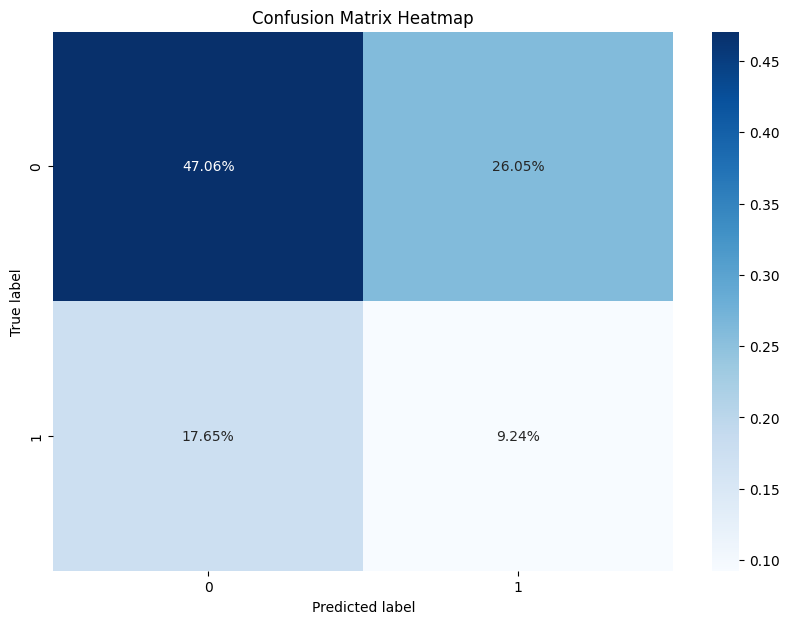

In [29]:
visualize_classification(y_test, y_pred_scaled_model)

In [36]:
coeff_df = pd.DataFrame(zip(X_train.columns, model_scaled.coef_[0]))
coeff_df.columns = ["feature","coefficient"]
coeff_df['exp'] = np.exp(coeff_df['coefficient'])
coeff_df

,feature,coefficient,exp
0,Gender,0.21,1.23
1,Age,-0.11,0.89
2,SleepDuration,0.04,1.04
3,QualityofSleep,-0.11,0.90
4,PhysicalActivityLevel,-0.31,0.73
5,StressLevel,0.07,1.08
6,BMICategory,0.09,1.09
7,HeartRate,-0.07,0.93
8,DailySteps,0.29,1.34


Text(0.5, 0, 'Importance')

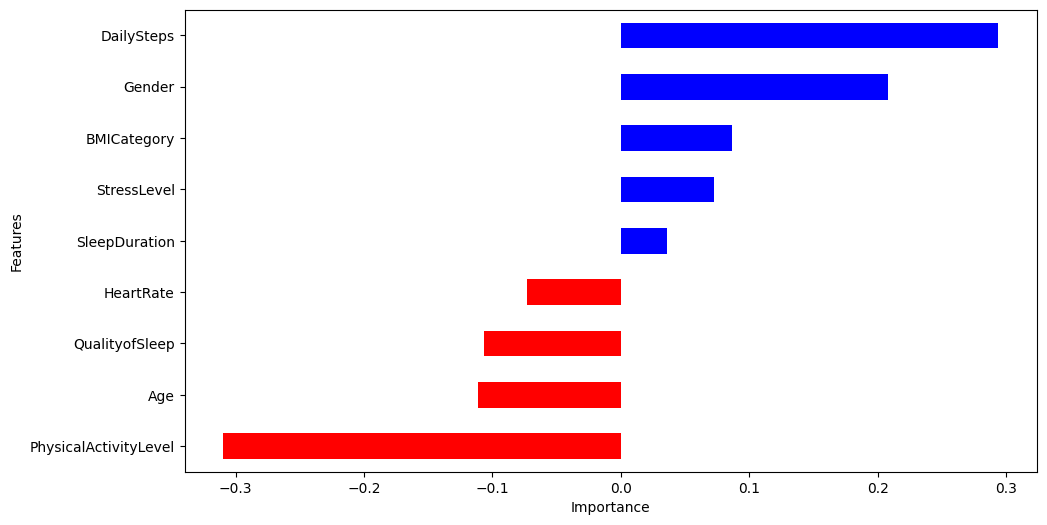

In [32]:
coeff = list(model_scaled.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [33]:
from lazypredict.Supervised import LazyClassifier
classifier = LazyClassifier(verbose=0, ignore_warnings=True,
                     custom_metric=None, predictions=True)
models, predictions = classifier.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 45.06it/s]

[LightGBM] [Info] Number of positive: 75, number of negative: 202
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 277, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.270758 -> initscore=-0.990780
[LightGBM] [Info] Start training from score -0.990780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [35]:
models.sort_values(by=['F1 Score','Balanced Accuracy'], ascending=False, axis=0)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.76,0.61,0.61,0.73,0.01
LabelPropagation,0.71,0.65,0.65,0.72,0.01
LabelSpreading,0.71,0.65,0.65,0.72,0.01
NuSVC,0.73,0.55,0.55,0.68,0.01
ExtraTreesClassifier,0.76,0.55,0.55,0.67,0.08
SGDClassifier,0.67,0.53,0.53,0.65,0.01
PassiveAggressiveClassifier,0.64,0.57,0.57,0.65,0.01
DecisionTreeClassifier,0.66,0.54,0.54,0.65,0.01
BaggingClassifier,0.70,0.51,0.51,0.64,0.02
